In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

test = pd.read_csv('/content/sample.csv')
train = pd.read_csv('/content/train.csv')

In [28]:
train = train.dropna()
month = []
time =[]
year = []
day = []
month1 = []
time1 =[]
year1 = []
day1=[]
weekday =[]
weekday1 =[]

In [41]:
train.head()

,total,year,month,time,day,weekday,season
1,154139.8084,2005.0,0,1,0,5,0
2,157818.3593,2005.0,0,2,0,5,0
3,149310.6991,2005.0,0,3,0,5,0
4,138282.0380,2005.0,0,4,0,5,0
5,132032.7479,2005.0,0,5,0,5,0


In [ ]:
for i in train['datetime']:
  month.append(i.split(' ')[0].split('.')[1])
  year.append(i.split(' ')[0].split('.')[2])
  time.append(i.split(' ')[1])
  day.append(i.split(' ')[0].split('.')[0])



for i in test['datetime']:
  month1.append(i.split(' ')[0].split('.')[1])
  year1.append(i.split(' ')[0].split('.')[2])
  time1.append(i.split(' ')[1]) 
  day1.append(i.split(' ')[0].split('.')[0])

In [30]:
for i in range(len(train['total'])):
  weekday.append(pd.to_datetime(year[i]+ '/'+month[i]+ '/'+ day[i]))
for i in range(len(test['total'])):
  weekday1.append(pd.to_datetime(year1[i]+ '/'+month1[i]+ '/'+ day1[i]))

In [ ]:
all_time = []
for i in range(len(train['total'])):
  all_time.append(year[i]*365*24+month[i]*30*24+day[i]*24+time[i])


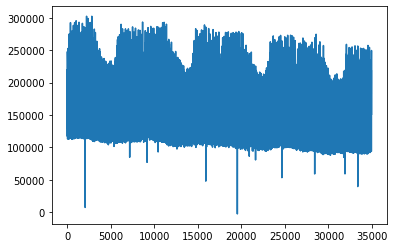

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(all_time, list(train['total']))
plt.show()

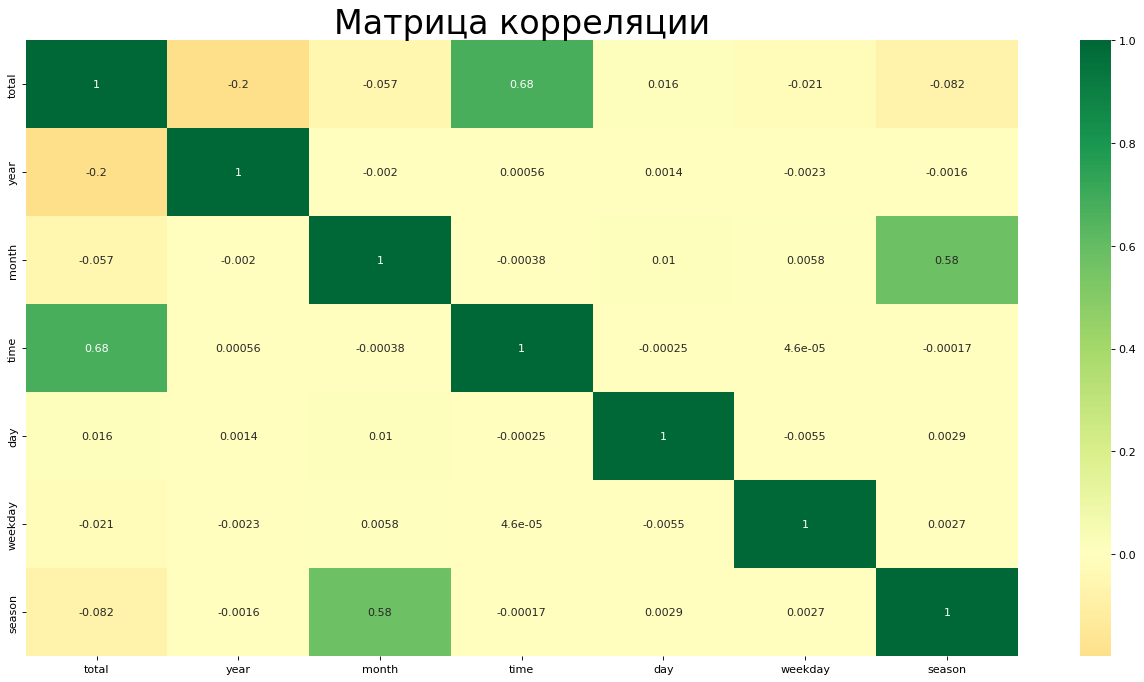

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [31]:
season =[]
season1 = []
for i in range(len(month)):
  if month[i] == '01' or month[i] == '02' or month[i] == '12':
    season.append(0)
  elif month[i] == '03' or month[i] == '04' or month[i] == '05':
    season.append(1)
  elif month[i] == '06' or month[i] == '07' or month[i] == '08':
    season.append(2)
  elif month[i] == '09' or month[i] == '10' or month[i] == '11':
    season.append(3)
for i in range(len(month1)):
  if month1[i] == '01' or month1[i] == '02' or month1[i] == '12':
    season1.append(0)
  elif month1[i] == '03' or month1[i] == '04' or month1[i] == '05':
    season1.append(1)
  elif month1[i] == '06' or month == '07' or month1[i] == '08':
    season1.append(2)
  elif month1[i] == '09' or month1[i] == '10' or month1[i] == '11':
    season1.append(3)

In [ ]:
train['year'] = year
train['month'] = month
train['time'] = time
train['day'] = day
train['weekday'] = weekday
train['season'] = season
train = train.drop(columns = ['datetime'])
test['year'] = year1
test['month'] = month1
test['time'] = time1
test['day'] = day1
test['weekday'] = weekday1
test['season'] = season1
test = test.drop(columns = ['datetime', 'total'])

In [33]:
lb = LabelEncoder()
#lb.fit(train['year'])
#train['year'] = lb.transform(train['year'])
#year = train['year']
lb = LabelEncoder()
lb.fit(train['month'])
train['month'] = lb.transform(train['month'])
month = train['month']
test['month'] = lb.transform(test['month'])
lb = LabelEncoder()
lb.fit(train['day'])
train['day'] = lb.transform(train['day'])
day = train['day']
test['day'] = lb.transform(test['day'])
lb = LabelEncoder()
lb.fit(train['time'])
time = train['time']
train['time'] = lb.transform(train['time'])
test['time'] = lb.transform(test['time'])
train['weekday'] = train['weekday'].dt.weekday
test['weekday'] = test['weekday'].dt.weekday

In [ ]:
test.head()

,year,month,time,day,weekday,season
0,2009,0,0,0,3,0
1,2009,0,1,0,3,0
2,2009,0,2,0,3,0
3,2009,0,3,0,3,0
4,2009,0,4,0,3,0


In [34]:
test['year'] = test['year'].astype(float)
train['year']= train['year'].astype(float)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X  = train.drop(columns = ['total'])
y = train['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34946 entries, 1 to 35063
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    34946 non-null  int64
 1   month   34946 non-null  int64
 2   time    34946 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
df = pd.read_csv('/content/sample.csv')
df['total'] = answ0
df.to_csv("/content/answ0.csv", index=False)

In [23]:
y_pred = model.predict(X_test)
answ0 = model.predict(test)

ValueError: ignored

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 26451.499435652233
Mean Squared Error: 1035353966.0721626
R2 score: 0.49948043507775086


In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
scores = []
for i in range(1,30):
    score = {}
    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    score['k'] = i
    score['Mean Absolute Errory'] = mean_absolute_error(y_test, y_pred)
    score['Mean Squared Erro'] = mean_squared_error(y_test, y_pred)
    score['R2 score'] = r2_score(y_test, y_pred)
    
    scores.append(score)
scores = pd.DataFrame(scores)
scores

,k,Mean Absolute Errory,Mean Squared Erro,R2 score
0,1,12761.206282,3.547428e+08,0.828507
1,2,7382.866233,1.244078e+08,0.939858
2,3,6819.947421,1.029535e+08,0.950229
3,4,6825.247812,1.014118e+08,0.950975
4,5,6981.536609,1.047678e+08,0.949352
5,6,7313.772478,1.136188e+08,0.945073
6,7,7584.780914,1.197363e+08,0.942116
7,8,7830.046033,1.261002e+08,0.939040
8,9,7982.457279,1.295210e+08,0.937386
9,10,8162.497333,1.332924e+08,0.935563


In [ ]:
knn = KNeighborsRegressor(3)
knn.fit(X,y)
answ1 = knn.predict(test)

In [ ]:
df = pd.read_csv('/content/sample.csv')
df['total'] = answ1
df.to_csv("/content/answ1.csv", index=False)

In [36]:
from sklearn.tree import DecisionTreeRegressor

elka = DecisionTreeRegressor( random_state=1)
elka.fit(X, y)
#y_pred_tree = elka.predict(X_test)
#print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_tree))
#print('Mean Squared Error:', mean_squared_error(y_test, y_pred_tree))
#print('R2 score:', r2_score(y_test, y_pred_tree))
answ2 = elka.predict(test)

In [38]:
df = pd.read_csv('/content/sample.csv')
df['total'] = answ2
df.to_csv("/content/answ3.csv", index=False)